In [1]:
# importing packages
import pandas as pd
import numpy as np    
import statsmodels.api as sm
import datetime
# import pmdarima as pm

from IPython.display import display, HTML, display_html
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
df = pd.read_csv('data/modelling_data.csv', index_col=0)

In [3]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1986-02-14', '1986-02-21', '1986-02-28', '1986-03-07',
               '1986-03-14', '1986-03-21', '1986-03-28', '1986-04-04',
               '1986-04-11', '1986-04-18',
               ...
               '2019-07-19', '2019-07-26', '2019-08-02', '2019-08-09',
               '2019-08-16', '2019-08-23', '2019-08-30', '2019-09-06',
               '2019-09-13', '2019-09-20'],
              dtype='datetime64[ns]', name='ds', length=1754, freq=None)

**Modelling**

In [4]:
# defining a function to fit our data to the model and also see RMSE and RSS
# RSS and RMSE used to check the accuracy of the model
# Low RSS, RMSE is our goal
# AIC & BIC scores also good measurements for accuracy

def run_sarima(df, ts,p,d,q,freq):
    """
    Run SARIMA Model
    """
    import statsmodels.api as sm

    # fit arima model
    model = sm.tsa.statespace.SARIMAX(df[ts],trend='n', order=(p,d,q), seasonal_order=(p,d,q,freq))
    results_ = model.fit()
    
    # RSS calculation
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]

    
    # calculate root mean square error(RMSE) and residual sum of squares(RSS)
    tss = sum([(i-np.mean(ts_modified))**2 for i in ts_modified])
    rss = sum((results_.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss/len(df[ts]))
    r_square = 1 - (rss/tss)
    
    # plot fit
    plt.plot(df[ts])
    plt.plot(results_.fittedvalues, color='red')
    plt.title('For SARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
    plt.show()
    plt.close()
    
    print(results_, results_.summary())

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


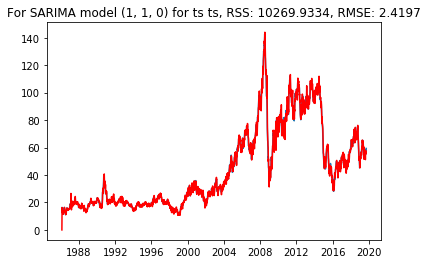

<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x1c17047e80>                                  Statespace Model Results                                 
Dep. Variable:                                 ts   No. Observations:                 1754
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -3915.721
Date:                            Fri, 04 Oct 2019   AIC                           7837.442
Time:                                    11:36:06   BIC                           7853.759
Sample:                                02-14-1986   HQIC                          7843.482
                                     - 09-20-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2016      0.013

In [5]:
mod1 = run_sarima(df=df,ts='ts',p=1,d=1,q=0,freq=52)

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


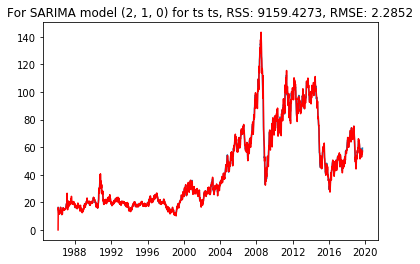

<statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x1c94f6d198>                                  Statespace Model Results                                 
Dep. Variable:                                 ts   No. Observations:                 1754
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -3819.228
Date:                            Fri, 04 Oct 2019   AIC                           7648.455
Time:                                    11:36:37   BIC                           7675.650
Sample:                                02-14-1986   HQIC                          7658.523
                                     - 09-20-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1991      0.013

In [6]:
mod1 = run_sarima(df=df,ts='ts',p=2,d=1,q=0,freq=52)

**mod1 results** 

* with parameters (p=1,d=1,q=0); result AIC=7837.442, BIC = 7853.759

In [7]:
df['ts'][1:1554]

ds
1986-02-21    14.39
1986-02-28    14.25
1986-03-07    12.27
1986-03-14    13.07
1986-03-21    13.45
              ...  
2015-10-23    45.16
2015-10-30    44.99
2015-11-06    45.98
2015-11-13    42.70
2015-11-20    40.62
Name: ts, Length: 1553, dtype: float64

In [8]:
# fit sarima model
model = sm.tsa.statespace.SARIMAX(df['ts'][0:1600],trend='n', order=(1,1,0), seasonal_order=(0,1,1,52))
res = model.fit()
print(res.summary())

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                 ts   No. Observations:                 1600
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 52)   Log Likelihood               -3318.255
Date:                            Fri, 04 Oct 2019   AIC                           6642.510
Time:                                    11:37:24   BIC                           6658.542
Sample:                                02-14-1986   HQIC                          6648.474
                                     - 10-07-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1801      0.012     14.788      0.000       0.156       0.204
ma.S.L52      -0.9741      0.028   

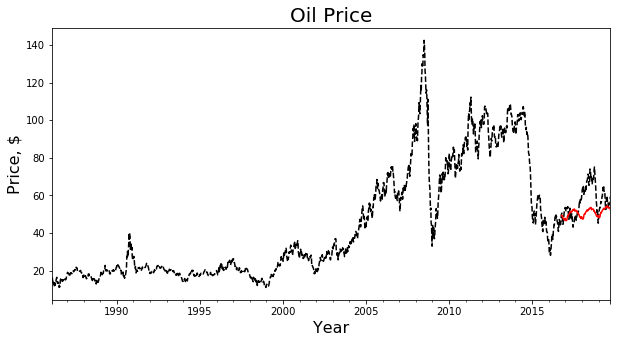

In [9]:
# forecast
df['forecast'] = res.predict(start = 1600, end=1754, dynamic=False)  
t_ax1 = df['ts'].plot(figsize=(10, 5),linestyle='--', color='black') 
t_ax2 = df['forecast'].plot(linestyle='-',color='red')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price', fontsize=20)
plt.savefig('testing.png')
plt.show()

In [10]:
npredict =df.ts['2017'].shape[0]
nobs = df.ts.shape[0]

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/core/indexing.py:947: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

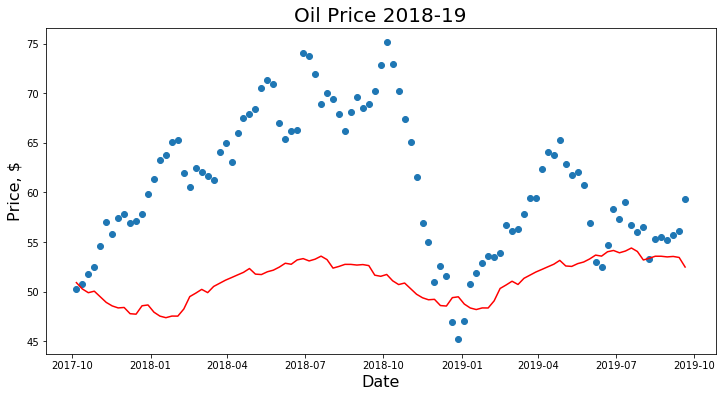

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
npre = 52

plt.xlabel('Date',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price 2018-19', fontsize=20)

ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'ts'], 'o', label='Observed')
ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'forecast'], 'red', label='Forecast')
plt.savefig('forecasted_vs_actual.png')
plt.show()

In [12]:
# re-training my model to whole data set to prepare for the prediction
# fit sarima model
model = sm.tsa.statespace.SARIMAX(df['ts'],trend='n', order=(1,1,0), seasonal_order=(0,1,1,52))
res = model.fit()
print(res.summary())

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                 ts   No. Observations:                 1754
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 52)   Log Likelihood               -3636.064
Date:                            Fri, 04 Oct 2019   AIC                           7278.128
Time:                                    11:38:44   BIC                           7294.445
Sample:                                02-14-1986   HQIC                          7284.169
                                     - 09-20-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1899      0.012     15.798      0.000       0.166       0.213
ma.S.L52      -0.9989      0.584   

In [13]:
# predicting 2019-2025
# creating future date time series

from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2019-09-20", "%Y-%m-%d")
date_list = [start + relativedelta(weeks=x) for x in range(0,260)]
future = pd.DataFrame(index=date_list, columns= df.columns)
pred = pd.concat([df, future])

**2019-2025 Prediction**

In [14]:
# prediction, dynamic=False
# creating new forecast column in our dataset
pred['forecast'] = res.predict(start = 1754, end=2014, dynamic=False)  

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


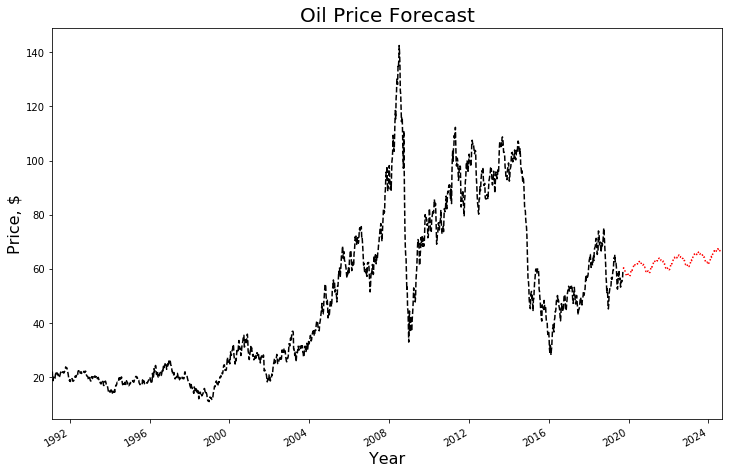

In [15]:
# plotting the prediction
ax1 = pred['ts'].ix[-1753:].plot(figsize=(12, 8), color='black',linestyle='--')
ax2 = pred['forecast'].ix[-1753:].plot(linestyle=':',color='red')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price Forecast', fontsize=20)

plt.savefig('ts_predict_future.png')
plt.show()

In [16]:
# prediction, dynamic =True
# creating forecast_dynamic column in our dataset
pred['forecast_dynamic'] = res.predict(start = 1753, end=2014, dynamic=True)  

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


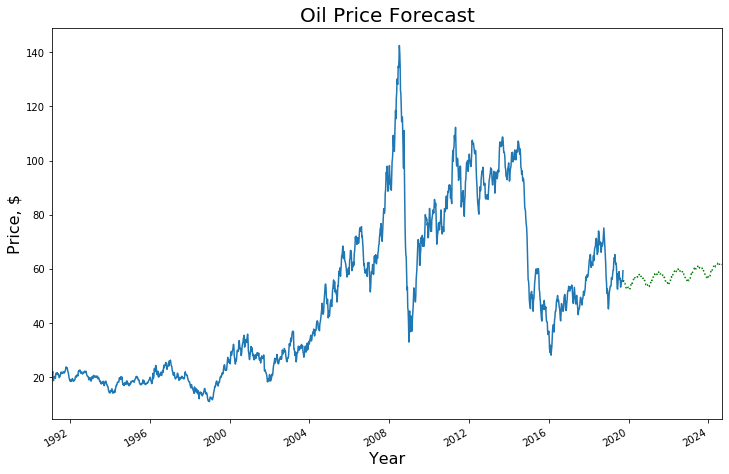

In [17]:
# plotting predicted values, dynamic = True
ax3 = pred['ts'].ix[-1754:].plot(figsize=(12, 8))
ax4 = pred['forecast_dynamic'].ix[-1754:].plot(linestyle=':',color='green')

plt.xlabel('Year',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price Forecast', fontsize=20)
plt.show()
#plt.savefig('ts_predict_future.png', bbox_inches='tight')